In [1]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.echonet_dataset import EchoNetDynamicDataset

### EchoNet-Dynamic

All the files that we are exploring in this notebook comes from the [EchoNet-Dynamic](https://echonet.github.io/dynamic/) Dataset released by Ouyang et al. If you have any questions about this dataset, you may want to consult EchoNet-Dynamic's [GitHub page](https://echonet.github.io/dynamic/) or Ouyang et al.'s [paper](https://www.nature.com/articles/s41586-020-2145-8).

### File list CSV file

In [2]:
df = pd.read_csv("dynamic_data/FileList.csv")
df

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
0,0X100009310A3BD7FC.avi,78.498406,14.881368,69.210534,112,112,50,174,VAL
1,0X1002E8FBACD08477.avi,59.101988,40.383876,98.742884,112,112,50,215,TRAIN
2,0X1005D03EED19C65B.avi,62.363798,14.267784,37.909734,112,112,50,104,TRAIN
3,0X10075961BC11C88E.avi,54.545097,33.143084,72.914210,112,112,55,122,TRAIN
4,0X10094BA0A028EAC3.avi,24.887742,127.581945,169.855024,112,112,52,207,VAL
...,...,...,...,...,...,...,...,...,...
10025,0X234005774F4CB5CD.avi,51.724743,47.065329,97.493690,768,1040,50,127,TRAIN
10026,0X2DC68261CBCC04AE.avi,62.187781,26.333478,69.642772,768,1024,50,66,TRAIN
10027,0X35291BE9AB90FB89.avi,62.070762,49.064338,129.357561,768,1024,50,208,TRAIN
10028,0X6C435C1B417FDE8A.avi,59.635257,57.721170,142.998978,768,1024,50,166,TRAIN


In [40]:
test_df = df[df["Split"] == "TEST"]
test_df[test_df["FileName"] == '0X5DD5283AC43CCDD1.avi']

,FileName,EF,ESV,EDV,FrameHeight,FrameWidth,FPS,NumberOfFrames,Split
10024,0X5DD5283AC43CCDD1.avi,62.691876,36.284389,97.256001,768,1024,50,188,TEST


### How many 32-frame clips will we get from each test video?

In [37]:
test_df = df[df["Split"] == "TEST"]
test_df = test_df[test_df["FileName"] != '0X5DD5283AC43CCDD1.avi']
np.mean(np.round(test_df["NumberOfFrames"] / 32)) 

5.545454545454546

### Volume Tracings CSV file
This file contains the clinical trace of left ventricle in the one ED/ES phase of every echo video.

In [5]:
df_trace = pd.read_csv("dynamic_data/VolumeTracings.csv")
df_trace

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC,47.918968,26.754480,62.904129,22.944693,46
...,...,...,...,...,...,...
425266,0XFEBEEFF93F6FEB9,45.419984,55.131136,69.758942,57.498739,38
425267,0XFEBEEFF93F6FEB9,45.017994,57.543075,69.399107,59.914779,38
425268,0XFEBEEFF93F6FEB9,44.616005,59.955014,69.039271,62.330818,38
425269,0XFEBEEFF93F6FEB9,44.214015,62.366952,68.712853,64.750108,38


### Identify the patients with multiple manual labels
Each manual labels is corresponding to 21 (x1, y1, x2, y2) lines (rows).

In [15]:
num_multi_mask_cases = 0

train_pat_filenames = []
val_pat_filenames = []
test_pat_filenames = []

for i in range(len(df_filename_trace_list)):
    indexes, counts = np.unique(df_filename_trace_list[i], return_counts=True)
    if len(counts) > 2 or np.sum(counts) != 42:
        pat_filename = df_filename_trace_list.index[i]
        split_name = df["Split"][df["FileName"] == (pat_filename + ".avi")].values[0]
        print(pat_filename + ":", counts, "SPLIT =", split_name)
        
        if split_name == "TRAIN":
            train_pat_filenames.append(pat_filename)
        elif split_name == "VAL":
            val_pat_filenames.append(pat_filename)
        elif split_name == "TEST":
            test_pat_filenames.append(pat_filename)
        
        num_multi_mask_cases += 1

0X12430512E2BBCD55: [ 84 147] SPLIT = TRAIN
0X13D1459C51B5C32E: [21 63] SPLIT = TRAIN
0X183FA1CAAEA9C545: [21 42] SPLIT = TRAIN
0X1CF4B07994B62DBB: [21 63] SPLIT = TEST
0X1E12EEE43FD913E5: [21 42] SPLIT = TEST
0X1F042F557F67EF0C: [21 63] SPLIT = TRAIN
0X200A81BEC98DEB6D: [21 63] SPLIT = VAL
0X208FBB50F39AAF69: [42 21] SPLIT = TRAIN
0X2507255D8DC30B4E: [63 21] SPLIT = TEST
0X278A875DF27E7F42: [42 21] SPLIT = TRAIN
0X27A14489647DFCB: [21 63] SPLIT = TRAIN
0X280B7441A7E287B2: [42 21] SPLIT = VAL
0X28980B95F9769CE7: [21 42] SPLIT = TRAIN
0X2AC09763183674E8: [21 63] SPLIT = VAL
0X2AD994F98C491FA6: [21 42] SPLIT = VAL
0X3269691452F4F42A: [42 21] SPLIT = VAL
0X3317BCA5B123B1DA: [21 42] SPLIT = TRAIN
0X354B37A25C64276F: [105  84] SPLIT = TRAIN
0X35A5E9C9075E56EE: [147  21] SPLIT = TRAIN
0X366AD377E4A81FBE: [42 21] SPLIT = TRAIN
0X367085DDC2E90657: [21 63] SPLIT = TRAIN
0X3693781992586497: [42 42] SPLIT = TRAIN
0X36C5A15AC7FC6AAA: [21 42] SPLIT = TRAIN
0X37F9E9981E207C04: [42 63] SPLIT = TRAIN


### At a particular training patient

In [120]:
df_patient = df_trace.loc[df_trace.FileName == train_pat_filenames[0]]
df_patient

,FileName,X1,Y1,X2,Y2,Frame
8274,0X12430512E2BBCD55,67.759797,104.894594,73.448126,106.394813,38
8275,0X12430512E2BBCD55,52.500000,69.416667,53.083333,104.125000,38
8276,0X12430512E2BBCD55,80.177880,29.458333,82.193890,32.885550,38
8277,0X12430512E2BBCD55,76.837691,29.483554,81.498336,37.406650,38
8278,0X12430512E2BBCD55,73.588838,29.664046,80.005927,40.573096,38
...,...,...,...,...,...,...
8500,0X12430512E2BBCD55,53.375000,68.833333,82.250000,28.875000,50
8501,0X12430512E2BBCD55,47.541667,102.375000,56.291667,69.416667,50
8502,0X12430512E2BBCD55,49.583333,102.958333,59.208333,65.041667,50
8503,0X12430512E2BBCD55,82.833333,73.500000,93.916667,38.208333,50


In [121]:
from src.echonet_dataset import EchoNetDynamicDataset

train_dataset = EchoNetDynamicDataset(split="train", raise_for_es_ed=False, clip_length="full")
val_dataset = EchoNetDynamicDataset(split="val", raise_for_es_ed=False, clip_length="full")
test_dataset = EchoNetDynamicDataset(split="test", raise_for_es_ed=False, clip_length="full")

100%|██████████| 16/16 [00:01<00:00, 14.06it/s]


In [57]:
from src.visualization_utils import echonet_overlay


def inspect_segmentation_at_ed_es(dataset, patient_index):
    video, (filename, EF, es_clip_index, ed_clip_index, es_index, ed_index, es_frame, ed_frame, es_label, ed_label) = dataset[patient_index]

    overlaid_true_ed = echonet_overlay(video[:, ed_index].transpose([1, 2, 0]), 
                                       ed_label, 
                                       vis=False,)

    overlaid_true_es = echonet_overlay(video[:, es_index].transpose([1, 2, 0]), 
                                       es_label, 
                                       vis=False,)

    fig, ax = plt.subplots(2, 2, figsize=(6, 6))

    ax[0][0].set_title("Clinic ED")
    ax[0][0].imshow(overlaid_true_ed)

    ax[1][0].set_title("Clinic ES")
    ax[1][0].imshow(overlaid_true_es)

    ax[0][1].set_title("ED Frame (frame {:d})".format(ed_index))
    ax[0][1].imshow(video[:, ed_index].transpose([1, 2, 0]))

    ax[1][1].set_title("ES Frame (frame {:d})".format(es_index))
    ax[1][1].imshow(video[:, es_index].transpose([1, 2, 0]))

    plt.tight_layout()

### Some EchoNet-Dynamic videos have wrong clinical label

This issue has been discussed in this issue thread of EchoNet-Dynamic's GitHub Repo:
[https://github.com/echonet/dynamic/issues/20](https://github.com/echonet/dynamic/issues/20)

It might haven been fixed in a later version of EchoNet-Dynamic. However, our project was conducted when such fix has not been provided. You may experience issues running our code if you choose to use to a later version of EchoNet-Dynamic.

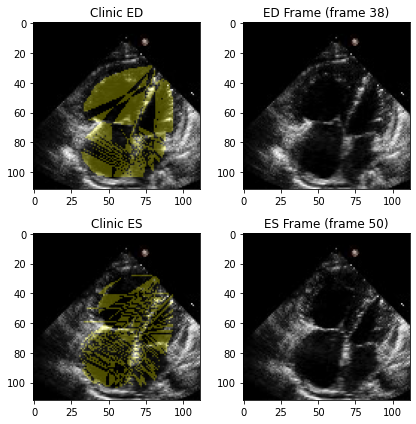

In [58]:
inspect_segmentation_at_ed_es(train_dataset, 160)

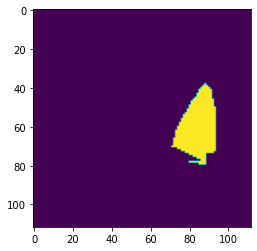

In [123]:
import skimage

i = 1
t = df_patient.loc[:, ["X1", "Y1", "X2", "Y2"]].values

x1, y1, x2, y2 = t[21 * i: 21 * (i+1), 0], t[21 * i: 21 * (i+1), 1], t[21 * i: 21 * (i+1), 2], t[21 * i: 21 * (i+1), 3]
x = np.concatenate((x1[1:], np.flip(x2[1:])))
y = np.concatenate((y1[1:], np.flip(y2[1:])))

r, c = skimage.draw.polygon(np.rint(y).astype(np.int), np.rint(x).astype(np.int), (video.shape[2], video.shape[3]))
mask = np.zeros((video.shape[2], video.shape[3]), np.float32)
mask[r, c] = 1

plt.imshow(mask)

### What is the average systolic length (in frames) for training videos?

The avergae length is about 16 frames. The 32-frame video clips should be able to capture a full (or near full) cardiac cycle.

In [9]:
ed_indexes = []
es_indexes = []

for data in train_dataset:
    video, (filename, EF, es_clip_index, ed_clip_index, es_index, ed_index, es_frame, ed_frame, es_label, ed_label) = data
    ed_indexes.append(ed_index)
    es_indexes.append(es_index)

ed_indexes = np.array(ed_indexes)
es_indexes = np.array(es_indexes)

In [15]:
np.mean(es_indexes - ed_indexes)

16.439034369885434